ZOOMCAMP HOMEWORK: WEEK 4

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

Dataset
In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).


In [1]:
#Load the libraries

import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn


In [2]:
#load the data

credit_data=pd.DataFrame(pd.read_csv("AER_credit_card_data.csv"))
credit_data.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
credit_data.shape
# (1319,13)

credit_data.isna().sum()
# no missing data in the dataset

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
target         0
dtype: int64


PREPARATION
Create the target variable by mapping yes to 1 and no to 0.
Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.


In [4]:
credit_data['target']=credit_data.card.apply(lambda x: 1 if x=="yes" else 0)
credit_data.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,target
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,1
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,1
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,1
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,1
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,1


In [5]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(credit_data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)

y_train = df_train.target.values
y_val = df_val.target.values
y_test= df_test.target.values

X_train=df_train.drop(['target', 'card'],axis=1)
X_val=df_val.drop(['target','card'],axis=1)
X_test=df_test.drop(['target', 'card'],axis=1)


Q1. 
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the card variable.

Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

[reports, dependents,active,share(!)]


In [8]:
X_train.dtypes

reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [10]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
categorical = ['owner', 'selfemp']

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    print('%9s, %.3f' % (col, auc))

  reports, 0.718
      age, 0.536
   income, 0.589
    share, 0.994
expenditure, 0.994
dependents, 0.526
   months, 0.536
majorcards, 0.529
   active, 0.595


We can also plot the ROC curve for 'share'

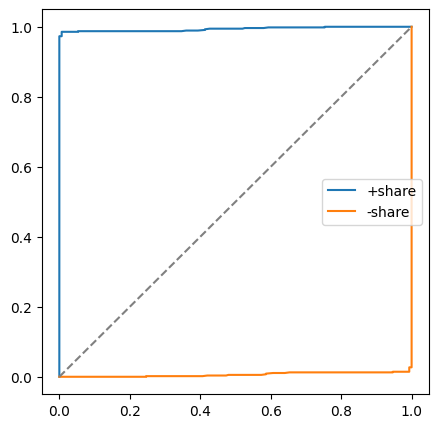

In [12]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.share)
plt.plot(fpr, tpr, label='+share')

fpr, tpr, _ = roc_curve(y_train, -df_train.share)
plt.plot(fpr, tpr, label='-share')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

TRAINING THE MODEL

From now on, use these columns only:

     ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
     LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [13]:
# to convert categorical features to nymerical using one-hot coding approach

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

# Convert the DataFrame to a dictionary
train_dicts = df_train[columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)

# Train the logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]


Q2. What's the AUC of this model on the validation dataset? (round to 3 digits)

[0.615,0.515,0.715,0.995]

answer: 0.991

In [14]:
roc_auc_score(y_val, y_pred)

0.9911710037174721

Q3. Now let's compute precision and recall for our model.

(a) Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
(b) For each threshold, compute precision and recall
(c) Plot them
(d) At which threshold precision and recall curves intersect?

[0.1,0.3,0.6,0.8]

answer: 0.1


In [16]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [17]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,269,80,0,0
10,0.1,263,15,6,65
20,0.2,259,3,10,77
30,0.3,257,1,12,79
40,0.4,257,1,12,79
50,0.5,257,1,12,79
60,0.6,257,1,12,79
70,0.7,257,1,12,79
80,0.8,257,1,12,79
90,0.9,257,0,12,80


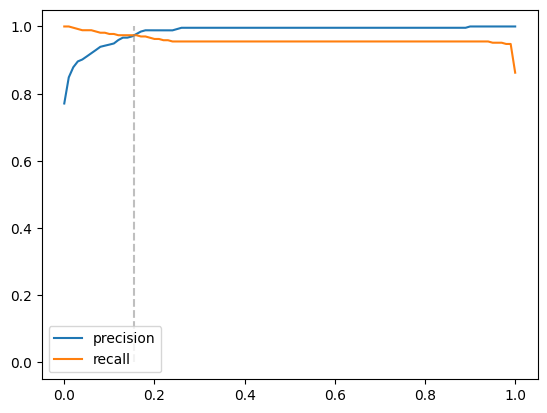

In [23]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.155, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [25]:
df_scores.head(5)

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,269,80,0,0,0.770774,1.000000,0.870550
1,0.01,269,48,0,32,0.848580,1.000000,0.918089
2,0.02,268,37,1,43,0.878689,0.996283,0.933798
3,0.03,267,31,2,49,0.895973,0.992565,0.941799
4,0.04,266,29,3,51,0.901695,0.988848,0.943262



Q4. Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 image.png

Where  is precision and  is recall.
Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

[0.1,0.4,0.6,0.7]

answer: 0.18

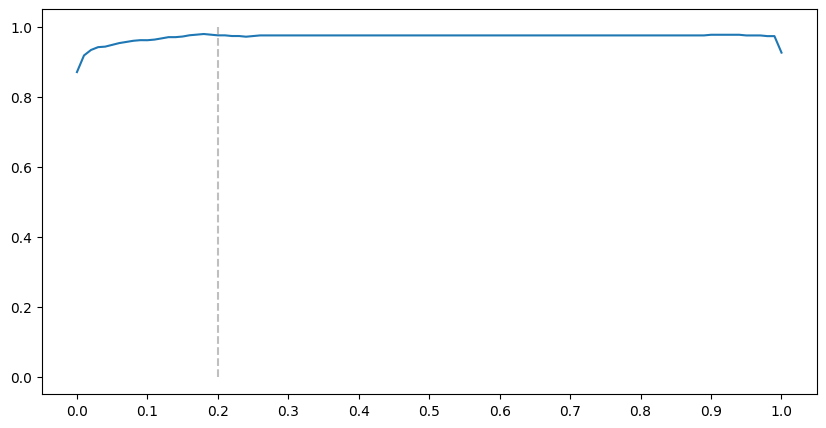

In [29]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.2, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [31]:
df_scores.f1.max()

# 0.9793621013133208

df_scores[df_scores.f1 == 0.9793621013133208]

,threshold,tp,fp,fn,tn,p,r,f1
18,0.18,261,3,8,77,0.988636,0.97026,0.979362


Q5. Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

(a) Iterate over different folds of df_full_train
(b) Split the data into train and validation
(c) Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
(d) Use AUC to evaluate the model on validation
(e) How large is standard devidation of the AUC scores across different folds?

[0.003,0.014,0.09,0.24]

answer: 0.003

In [33]:
from sklearn.model_selection import KFold

# to define a function to train logistic regression
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

#to define a function to predict values using trained model
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
scores = []



Q6. Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]

(a) Initialize KFold with the same parameters as previously
(b) Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
(c) Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

[0.01,0.1,1,10]

(If you have ties, select the score with the lowest std. If you still have ties, select the smallest C)

answer: 1

In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

c_options=[0.01,0.1,1,10]

for val in c_options:

    for train_idx, val_idx in kfold.split(df_train_full):
        
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.target.values
        y_val = df_val.target.values

        dv, model = train(df_train, y_train, C=val)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C value:', val)
    print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

C value: 0.01
0.995 +- 0.005
C value: 0.1
0.995 +- 0.004
C value: 1
0.995 +- 0.004
C value: 10
0.995 +- 0.004


SUBMIT RESULTS

Submit your results here: https://forms.gle/8TfKNRd5Jq7sGK5M9

You can submit your solution multiple times. In this case, only the last submission will be used
If your answer doesn't match options exactly, select the closest one

DEADLINE
The deadline for submitting is October 3 (Monday), 23:00 CEST.
After that, the form will be closed.